# Capstone Notebook

## Casey Nosiglia

In this notebook, we will do the data manipulation that will allow us to create directories for our business questions of (1) determining if a leaf is diseased or not, and (2) determining if a given species of plant (e.g., `Tomato`) is diseased or not, and if it is diseased, what kind of disease does it have. The dataset is the plant disease dataset from Kaggle: https://www.kaggle.com/datasets/saroz014/plant-disease
This dataset includes ~54.3k image files at about 2GB, with 12 different species, and 38 different classes in total.

This notebook is meant to be operated from the same directory as the dataset.

In [ ]:
# if this line is run, it will give all the version requirements of the libraries laded in.
# This may be a useful reference for later
pip freeze > requirements.txt

In [1]:
# load in all of the relevant libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
# image handling libraries
import os
import PIL
import PIL.Image
import pathlib

In [4]:
import glob
from PIL import Image 

## Data Manipulation

We write down the lists `class_names_list` and `species_list` for now, as they wil be useful for data manipulation.

In [12]:
# list of all of the different class names (38 in total):
class_names_list = ['Apple___Apple_scab',
                    'Apple___Black_rot',
                    'Apple___Cedar_apple_rust',
                    'Apple___healthy',
                    'Blueberry___healthy',
                    'Cherry_(including_sour)___healthy',
                    'Cherry_(including_sour)___Powdery_mildew',
                    'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
                    'Corn_(maize)___Common_rust_',
                    'Corn_(maize)___healthy',
                    'Corn_(maize)___Northern_Leaf_Blight',
                    'Grape___Black_rot',
                    'Grape___Esca_(Black_Measles)',
                    'Grape___healthy',
                    'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
                    'Orange___Haunglongbing_(Citrus_greening)',
                    'Peach___Bacterial_spot',
                    'Peach___healthy',
                    'Pepper,_bell___Bacterial_spot',
                    'Pepper,_bell___healthy',
                    'Potato___Early_blight',
                    'Potato___healthy',
                    'Potato___Late_blight',
                    'Raspberry___healthy',
                    'Soybean___healthy',
                    'Squash___Powdery_mildew',
                    'Strawberry___healthy',
                    'Strawberry___Leaf_scorch',
                    'Tomato___Bacterial_spot',
                    'Tomato___Early_blight',
                    'Tomato___healthy',
                    'Tomato___Late_blight',
                    'Tomato___Leaf_Mold',
                    'Tomato___Septoria_leaf_spot',
                    'Tomato___Spider_mites Two-spotted_spider_mite',
                    'Tomato___Target_Spot',
                    'Tomato___Tomato_mosaic_virus',
                    'Tomato___Tomato_Yellow_Leaf_Curl_Virus']
len(class_names_list)

38

In [13]:
# list of all the different species of plants
species_list = ['Apple',
                'Blueberry',
                'Cherry_(including_sour)',
                'Corn_(maize)',
                'Grape',
                'Orange',
                'Peach',
                'Pepper,_bell',
                'Potato', 
                'Raspberry',
                'Soybean', 
                'Squash',
                'Strawberry',
                'Tomato']

len(species_list)

14

We can define some useful functions in order to manipulate the `dataset` directory, in order to reorder the data for our particular questions that we want to answer.

## Functions:

### ID Function:

In [14]:
# a function which gives a full list of the filepath names 
# (these are the unique identifiers of the images):
def filepath_names(test_or_train):
    filepath_name = []
    for i in range(0,len(class_names_list)):
        for f in glob.iglob("dataset/" + test_or_train + '/' + class_names_list[i] + '/*'):
            filepath_name.append(f)
    return filepath_name

In [15]:
len(filepath_names("train"))

43456

### Is Diseased function:

In [16]:
# a function which gives a list of binary indicators of dieased (1) or not (0):
def diseased(test_or_train):
    is_diseased = []
    for i in range(0,len(class_names_list)):
        for f in glob.iglob("dataset/" + test_or_train + '/' + class_names_list[i] + '/*'):
            
            # if the string has healthy in it
            if "healthy" in class_names_list[i]:
                # not diseased
                is_diseased.append(0)
            else:
                # diseased
                is_diseased.append(1)
                
    return is_diseased

In [17]:
len(diseased("train"))

43456

### Species Function

In [18]:
# a function which gives the species type:
def species(test_or_train):
    species_type = []
    for i in range(0,len(class_names_list)):
        for f in glob.iglob("dataset/" + test_or_train + '/' + class_names_list[i] + '/*'):
            
            # return the disease name if it isn't healthy:
            for j in range(0, len(species_list)):
                if species_list[j] in class_names_list[i]:
                    species_type.append(species_list[j])
    return species_type

In [19]:
len(species("train"))

43456

### Disease Type Function

In [20]:
# function which gives the disease type:
def disease(test_or_train):
    disease_type = []
    for i in range(0,len(class_names_list)):
        for f in glob.iglob("dataset/" + test_or_train + '/' + class_names_list[i] + '/*'):
            
            # iterate over species:
            for j in range(0, len(species_list)):
                # check if not healthy and if a given species:
                if (species_list[j] in class_names_list[i]) & ("healthy" not in class_names_list[i]):
                    # split the part off after the species name
                    disease_type.append(class_names_list[i].split("___")[1])
                elif (species_list[j] in class_names_list[i]) & ("healthy" in class_names_list[i]):
                    disease_type.append("healthy")
    return disease_type

Using the above functions, we want to create a dataframe containing information of the filepath, the disease status, the species, and the disease type:

In [21]:
# dataframe for the train data.
train_dataframe = pd.DataFrame({'ID':filepath_names("train"), 
                                'is_diseased':diseased("train"),
                                'Species':species("train"),
                                'Disease_Type':disease("train")})

In [22]:
train_dataframe.sample(5)

,ID,is_diseased,Species,Disease_Type
41022,dataset/train/Tomato___Tomato_Yellow_Leaf_Curl...,1,Tomato,Tomato_Yellow_Leaf_Curl_Virus
29343,dataset/train/Tomato___Bacterial_spot/a435a766...,1,Tomato,Bacterial_spot
33733,dataset/train/Tomato___Late_blight/4780302b-33...,1,Tomato,Late_blight
25954,dataset/train/Soybean___healthy/90c417d5-6d8b-...,0,Soybean,healthy
42466,dataset/train/Tomato___Tomato_Yellow_Leaf_Curl...,1,Tomato,Tomato_Yellow_Leaf_Curl_Virus


We want to do the same for the test data, and then we can concatenate both to get the final dataframe:

In [23]:
test_dataframe = pd.DataFrame({'ID':filepath_names("test"), 
                                'is_diseased':diseased("test"),
                                'Species':species("test"),
                                'Disease_Type':disease("test")})

In [24]:
# concatenate the two to get the full dataset
full_dataframe = pd.concat([train_dataframe, test_dataframe], axis=0)

In [25]:
# reindex
full_dataframe.reset_index(drop=True, inplace=True)

In [26]:
full_dataframe.sample(5)

,ID,is_diseased,Species,Disease_Type
38634,dataset/train/Tomato___Target_Spot/14f0c0f2-b4...,1,Tomato,Target_Spot
47686,dataset/test/Peach___Bacterial_spot/0bbbbca0-8...,1,Peach,Bacterial_spot
26885,dataset/train/Squash___Powdery_mildew/63cf9e86...,1,Squash,Powdery_mildew
36875,dataset/train/Tomato___Spider_mites Two-spotte...,1,Tomato,Spider_mites Two-spotted_spider_mite
15446,dataset/train/Orange___Haunglongbing_(Citrus_g...,1,Orange,Haunglongbing_(Citrus_greening)


In [27]:
full_dataframe.shape

(54305, 4)

We can look at the full counts of the data by `Disease_Type` and `Species`:

In [28]:
full_dataframe[['Disease_Type','Species']].value_counts()

Disease_Type                          Species                
Haunglongbing_(Citrus_greening)       Orange                     5507
Tomato_Yellow_Leaf_Curl_Virus         Tomato                     5357
healthy                               Soybean                    5090
Bacterial_spot                        Peach                      2297
                                      Tomato                     2127
Late_blight                           Tomato                     1909
Powdery_mildew                        Squash                     1835
Septoria_leaf_spot                    Tomato                     1771
Spider_mites Two-spotted_spider_mite  Tomato                     1676
healthy                               Apple                      1645
                                      Tomato                     1591
                                      Blueberry                  1502
                                      Pepper,_bell               1478
Target_Spot                 

We can also look at the diseased/healthy rate in a plot:

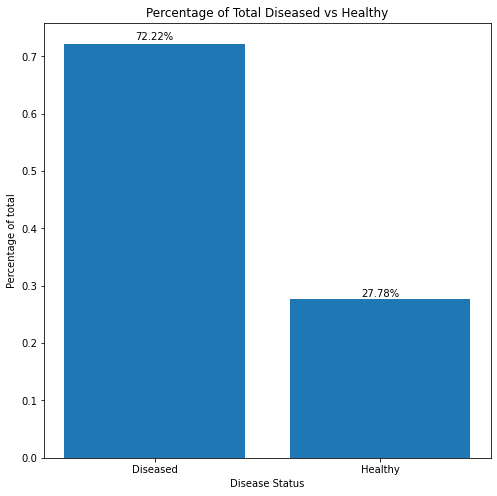

In [56]:
# diseased vs healthy plot:
plt.figure(figsize = (8,8))
graph = plt.bar(["Diseased",'Healthy'],full_dataframe['is_diseased'].value_counts(normalize=True))
plt.xlabel('Disease Status')
plt.ylabel("Percentage of total")
plt.title("Percentage of Total Diseased vs Healthy")
 
i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(round(100*full_dataframe['is_diseased'].value_counts(normalize=True)[1-i],2))+'%',
             ha='center')
    i+=1
plt.show()

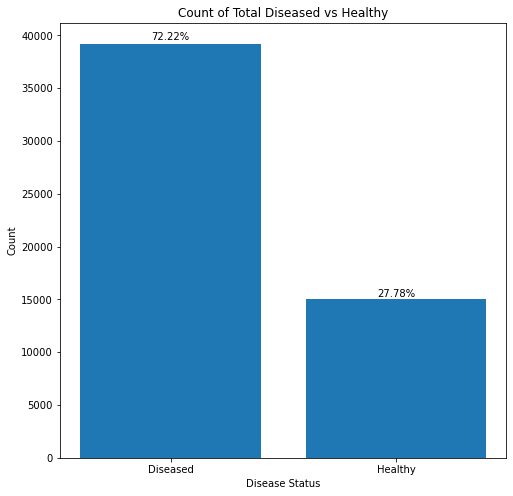

In [59]:
# diseased vs healthy plot (raw numbers):
plt.figure(figsize = (8,8))
graph = plt.bar(["Diseased",'Healthy'],full_dataframe['is_diseased'].value_counts())
plt.xlabel('Disease Status')
plt.ylabel("Count")
plt.title("Count of Total Diseased vs Healthy")

i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(round(100*full_dataframe['is_diseased'].value_counts(normalize=True)[1-i],2))+'%',
             ha='center')
    i+=1
plt.show()

We see that it is about 70/30, which is an ok split, but we can manipulate the data more later in order to get an even split there for the classification task of Healthy\Diseased.

We can further look at the species distribution, the healthy species distirbution, and the diseased species distribution:

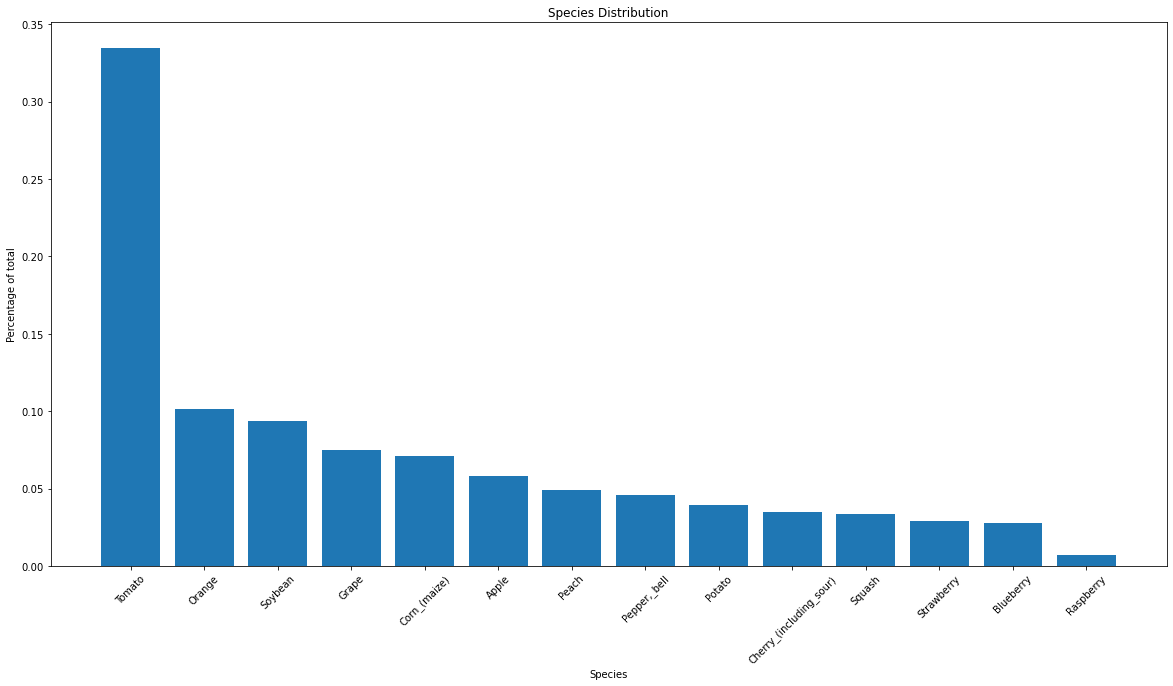

In [30]:
plt.figure(figsize = (20,10))
plt.bar(full_dataframe['Species'].value_counts().index,full_dataframe['Species'].value_counts(normalize = True))
plt.xticks(rotation = 45)
plt.xlabel('Species')
plt.ylabel("Percentage of total")
plt.title("Species Distribution")
plt.show()

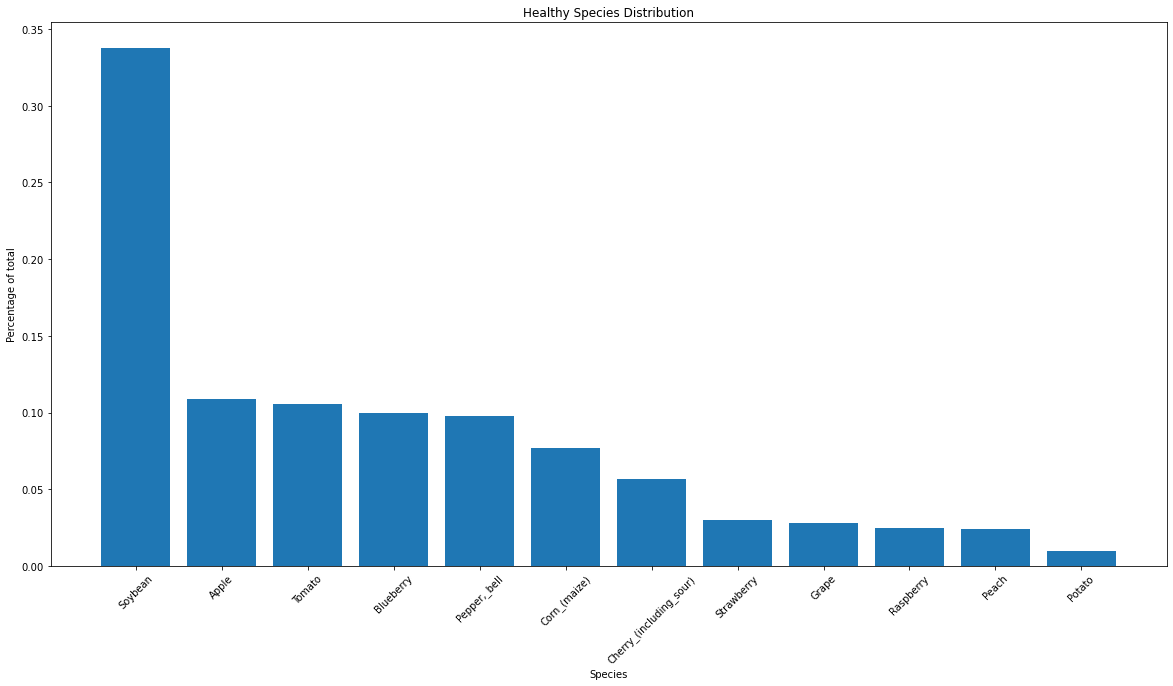

In [31]:
plt.figure(figsize = (20,10))
plt.bar(full_dataframe[full_dataframe['is_diseased'] == 0]['Species'].value_counts().index,full_dataframe[full_dataframe['is_diseased'] == 0]['Species'].value_counts(normalize = True))
plt.xlabel('Species')
plt.xticks(rotation = 45)
plt.ylabel("Percentage of total")
plt.title("Healthy Species Distribution")
plt.show()

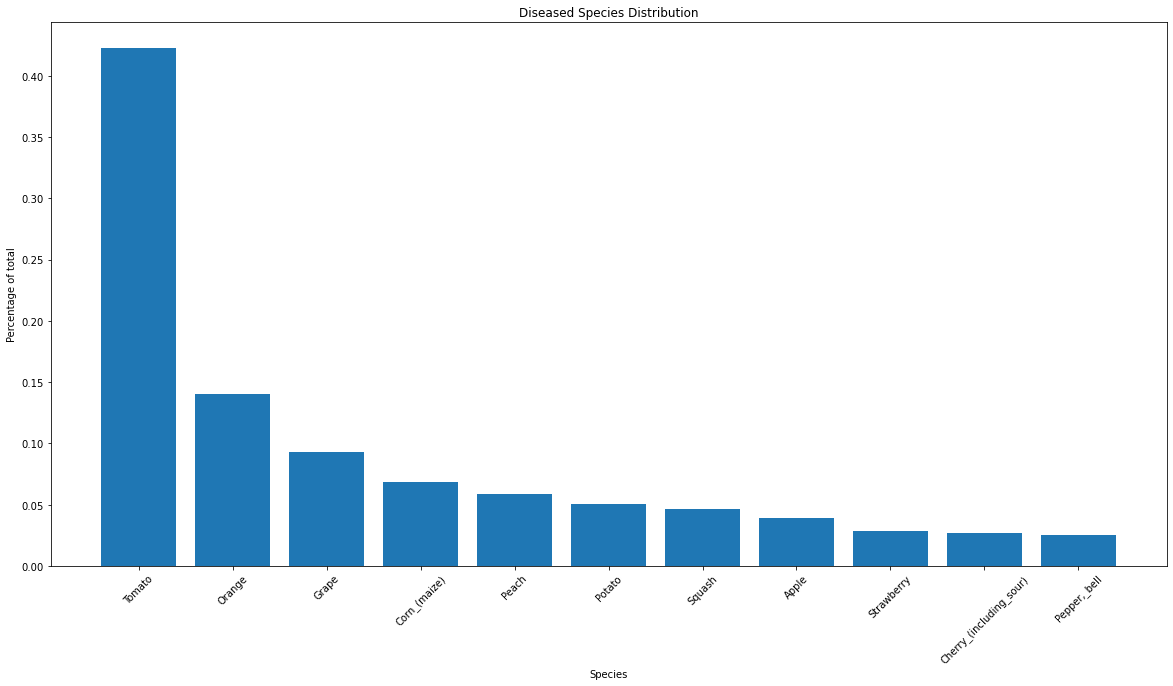

In [32]:
plt.figure(figsize = (20,10))
plt.bar(full_dataframe[full_dataframe['is_diseased'] == 1]['Species'].value_counts().index,full_dataframe[full_dataframe['is_diseased'] == 1]['Species'].value_counts(normalize = True))
plt.xlabel('Species')
plt.xticks(rotation = 45)
plt.ylabel("Percentage of total")
plt.title("Diseased Species Distribution")
plt.show()

We see that `Tomato` is dominant in the species distribution, so we want to look at the class distribution for just `Tomato`:

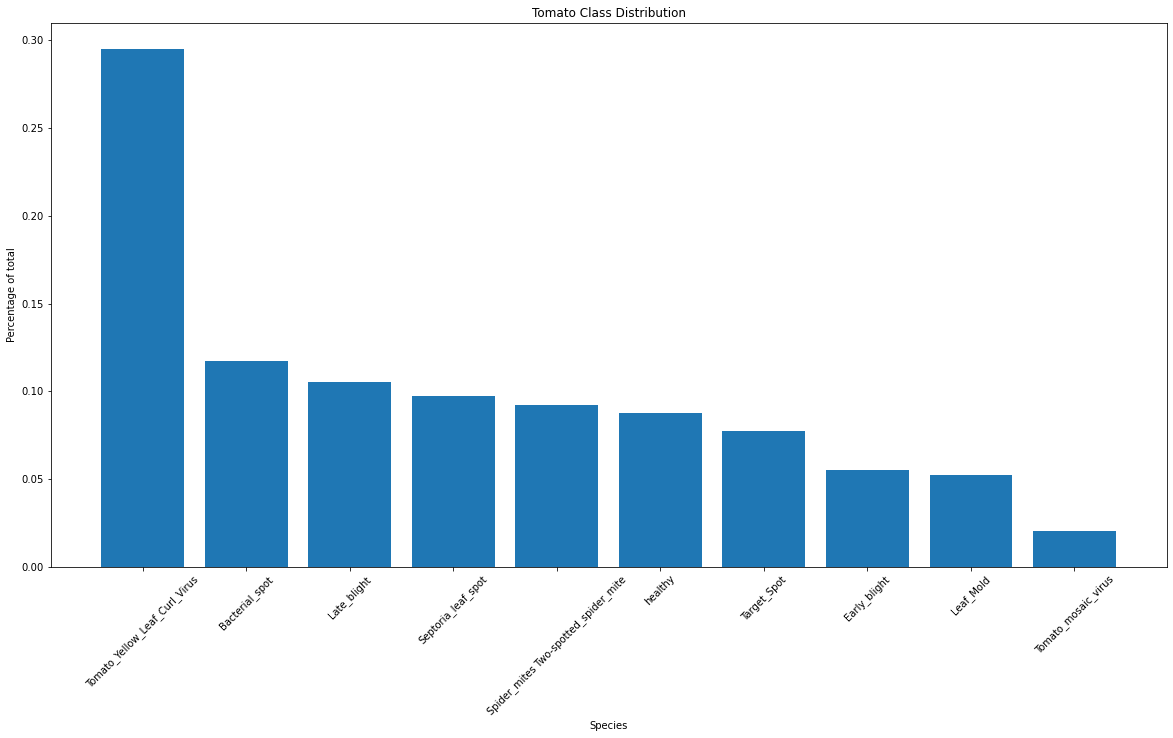

In [33]:
plt.figure(figsize = (20,10))
plt.bar(full_dataframe[full_dataframe['Species']=='Tomato']['Disease_Type'].value_counts().index,full_dataframe[full_dataframe['Species']=='Tomato']['Disease_Type'].value_counts(normalize = True))
plt.xlabel('Species')
plt.xticks(rotation = 45)
plt.ylabel("Percentage of total")
plt.title("Tomato Class Distribution")
plt.show()

## Creating the image directories for diseased/healthy and all classes (we end up not using the latter)

For diseased vs not diseased, we only want to have the info of whether or not it is diseased and the image file. So we can do a train-test split this way. Want to get the filepaths for iterating over for both the test and the train sub-directories:

In [ ]:
filepaths_fulldf = []
for i in range(0,len(full_dataframe)):
    filepaths_fulldf.append(full_dataframe['ID'][i][0:full_dataframe['ID'][i].rfind('/')+1]+'*')

In [ ]:
# get the unique filepaths
filepaths_fulldf_unique = []
[filepaths_fulldf_unique.append(x) for x in filepaths_fulldf if x not in filepaths_fulldf_unique];

In [ ]:
filepaths_fulldf_unique

In [ ]:
len(filepaths_fulldf_unique)

This makes sense, since we have 38 different categories for test and for train (38+38 = 76)

We want to reduce the number of images so that we can tractably model the data.

### Downsampling and upsampling

In [ ]:
# want to save the full_dataframe to  csv so that we can access it from other notebooks:
full_dataframe.to_csv("full_dataframe.csv")

In [ ]:
full_dataframe[['Species', 'Disease_Type']].value_counts()

We will downsample larger categories down to 750, and upsample smaller categories to 750, in order to have a more tractable dataset of 750*38 = 28,500 images

In [34]:
# get the indices for the various categories
spec_dis_list = full_dataframe[['Species', 'Disease_Type']].value_counts().index.to_list()

In [35]:
resampled = pd.DataFrame(columns = ['ID', 'is_diseased', 'Species','Disease_Type'])

#resampling loop (including randomized downsampling and upsampling):
for i in range(0,len(spec_dis_list)):
    # downsampling
    if full_dataframe.loc[(full_dataframe['Species'] == spec_dis_list[i][0]) & 
                          (full_dataframe['Disease_Type'] == spec_dis_list[i][1])].shape[0] > 750:
        resampled = pd.concat([resampled, full_dataframe.loc[(full_dataframe['Species'] == spec_dis_list[i][0]) & 
                          (full_dataframe['Disease_Type'] == spec_dis_list[i][1])].sample(750)],
              axis = 0)
    # upsampling    
    else: 
        resampled = pd.concat([resampled, full_dataframe.loc[(full_dataframe['Species'] == spec_dis_list[i][0]) & 
                          (full_dataframe['Disease_Type'] == spec_dis_list[i][1])].sample(750, replace = True)],
              axis = 0)
    

In [36]:
resampled[['Species', 'Disease_Type']].value_counts()

Species                  Disease_Type                        
Apple                    Apple_scab                              750
Tomato                   Bacterial_spot                          750
Potato                   Late_blight                             750
                         healthy                                 750
Raspberry                healthy                                 750
Soybean                  healthy                                 750
Squash                   Powdery_mildew                          750
Strawberry               Leaf_scorch                             750
                         healthy                                 750
Tomato                   Early_blight                            750
Apple                    Black_rot                               750
Tomato                   Late_blight                             750
                         Leaf_Mold                               750
                         Septoria_leaf_sp

In [37]:
resampled['is_diseased'].value_counts()

1    19500
0     9000
Name: is_diseased, dtype: int64

We also want to sample the class `is_diseased` to be more even, so we will create another dataframe that resamples along this category:

### Diseased/healthy 

We will create a diseased/healthy dataframe (called `resampled2`) also:

In [38]:
resampled2 = pd.concat([resampled.loc[resampled['is_diseased'] == 1].sample(9000), resampled.loc[resampled['is_diseased'] == 0]], axis = 0)

In [39]:
# even
resampled2['is_diseased'].value_counts()

1    9000
0    9000
Name: is_diseased, dtype: int64

We can make this into a plot:

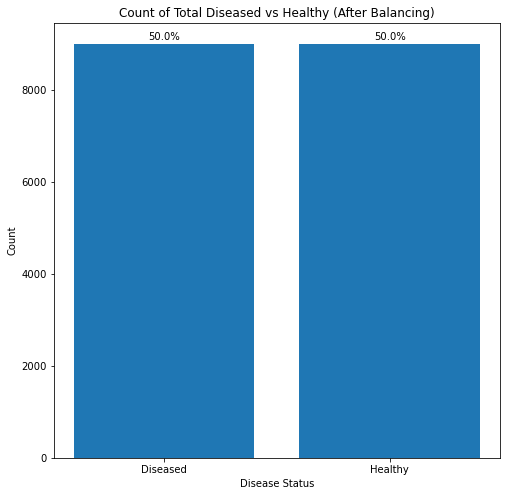

In [61]:
# diseased vs healthy plot:
plt.figure(figsize = (8,8))
graph = plt.bar(["Diseased",'Healthy'],resampled2['is_diseased'].value_counts())
plt.xlabel('Disease Status')
plt.ylabel("Count")
plt.title("Count of Total Diseased vs Healthy (After Balancing)")
 
i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(round(100*resampled2['is_diseased'].value_counts(normalize=True)[1-i],1))+'%',
             ha='center')
    i+=1
plt.show()

In [40]:
resampled[['Species','Disease_Type']].value_counts()

Species                  Disease_Type                        
Apple                    Apple_scab                              750
Tomato                   Bacterial_spot                          750
Potato                   Late_blight                             750
                         healthy                                 750
Raspberry                healthy                                 750
Soybean                  healthy                                 750
Squash                   Powdery_mildew                          750
Strawberry               Leaf_scorch                             750
                         healthy                                 750
Tomato                   Early_blight                            750
Apple                    Black_rot                               750
Tomato                   Late_blight                             750
                         Leaf_Mold                               750
                         Septoria_leaf_sp

In [41]:
resampled2[['Species','Disease_Type']].value_counts()

Species                  Disease_Type                        
Pepper,_bell             healthy                                 750
Corn_(maize)             healthy                                 750
Strawberry               healthy                                 750
Soybean                  healthy                                 750
Raspberry                healthy                                 750
Potato                   healthy                                 750
Peach                    healthy                                 750
Grape                    healthy                                 750
Tomato                   healthy                                 750
Blueberry                healthy                                 750
Cherry_(including_sour)  healthy                                 750
Apple                    healthy                                 750
Peach                    Bacterial_spot                          372
Tomato                   Late_blight     

In [42]:
# reset index for resampled
resampled.reset_index(drop=True,inplace=True)

In [43]:
# reset index for resampled2
resampled2.reset_index(drop=True,inplace=True)

In [44]:
resampled2.head()

,ID,is_diseased,Species,Disease_Type
0,dataset/train/Tomato___Bacterial_spot/fddcff1d...,1,Tomato,Bacterial_spot
1,dataset/train/Corn_(maize)___Common_rust_/RS_R...,1,Corn_(maize),Common_rust_
2,dataset/train/Apple___Apple_scab/c563cf1c-da17...,1,Apple,Apple_scab
3,dataset/test/Grape___Leaf_blight_(Isariopsis_L...,1,Grape,Leaf_blight_(Isariopsis_Leaf_Spot)
4,dataset/train/Tomato___Spider_mites Two-spotte...,1,Tomato,Spider_mites Two-spotted_spider_mite


We now want to make a new image directory from `resampled2` which wil be easy to manipulate for later modeling. We add a train subdirectory, a validation subdirectory, and a test subdirectory:

In [ ]:
# make a new directory for resampled2
! mkdir resampled2
! mkdir resampled2/train
! mkdir resampled2/train/diseased
! mkdir resampled2/train/healthy
! mkdir resampled2/test
! mkdir resampled2/test/diseased
! mkdir resampled2/test/healthy
! mkdir resampled2/validation
! mkdir resampled2/validation/diseased
! mkdir resampled2/validation/healthy

Since we upsampled and downsampled in the creation of `resampled` and `resampled2`, we need to be able to copy the same file more than once to the new directories, so we use a special function called `safe_copy` which enables this: 

In [ ]:
# definition taken from:
# https://stackoverflow.com/questions/33282647/python-shutil-copy-if-i-have-a-duplicate-file-will-it-copy-to-new-location

def safe_copy(file_path, out_dir, dst = None):
    """Safely copy a file to the specified directory. If a file with the same name already 
    exists, the copied file name is altered to preserve both.

    :param str file_path: Path to the file to copy.
    :param str out_dir: Directory to copy the file into.
    :param str dst: New name for the copied file. If None, use the name of the original
        file.
    """
    name = dst or os.path.basename(file_path)
    if not os.path.exists(os.path.join(out_dir, name)):
        shutil.copy(file_path, os.path.join(out_dir, name))
    else:
        base, extension = os.path.splitext(name)
        i = 1
        while os.path.exists(os.path.join(out_dir, '{}_{}{}'.format(base, i, extension))):
            i += 1
        shutil.copy(file_path, os.path.join(out_dir, '{}_{}{}'.format(base, i, extension)))

   We now want to generate the train/val/test split for `resampled2`, in order to get the randomized train validation and test directories we want. We will also use stratify by the folder name in order to keep the class balance:

We will add a `Folder` column to `resampled2` in order to stratify:

In [ ]:
# Folder column
spec_dis2 = [item.split("/")[2] for item in resampled2['ID']]
spec_dis2 = pd.DataFrame({"Folder":spec_dis2})

# concatenate
resampled2 = pd.concat([resampled2, spec_dis2], axis=1)

In [ ]:
resampled2.head()

In [ ]:
from sklearn.model_selection import train_test_split

train_resampled2, test_resampled2 = train_test_split(resampled2, test_size=0.2, stratify = resampled2['Folder'])
train_r_resampled2, val_resampled2 = train_test_split(train_resampled2, test_size=0.3, stratify = train_resampled2['Folder'])

Now we can fill up the `resampled2` directory, which represents diseased/healthy plants:

In [ ]:
# fill up the resampled2 directory:
import shutil

train_IDs = train_r_resampled2['ID'].to_list()
test_IDs = test_resampled2['ID'].to_list()
val_IDs = val_resampled2['ID'].to_list()

for ID in train_IDs:
    if 'healthy' in ID:
        safe_copy(ID, 'resampled2/train/healthy')
    else:
        safe_copy(ID, 'resampled2/train/diseased')
        
for ID in test_IDs:
    if 'healthy' in ID:
        safe_copy(ID, 'resampled2/test/healthy')
    else:
        safe_copy(ID, 'resampled2/test/diseased')
        
for ID in val_IDs:
    if 'healthy' in ID:
        safe_copy(ID, 'resampled2/validation/healthy')
    else:
        safe_copy(ID, 'resampled2/validation/diseased')

Now I can easily do data preprocessing for the CNN using Keras for the `resampled2` data, by using the `ImageDataGenerator` function, which directly loads from a directory, and which can enable batching and save a lot of memory during training of a CNN.

We will also create a `resampled` directory for our even split among all classes that we created. To do so, first we will create a list of the folder names so that we can easily make the directory structure:

In [ ]:
# make a list of the desired file paths:
folders = [spec_dis_list[i][0]+'___'+spec_dis_list[i][1] for i\
              in range(0,len(spec_dis_list))]

In [ ]:
# make a new directory for resampled:
! mkdir resampled
! mkdir resampled/test
! mkdir resampled/train
! mkdir resampled/validation
for folder in folders:
    os.mkdir(os.path.join('resampled/test/',folder))
    os.mkdir(os.path.join('resampled/train/',folder))
    os.mkdir(os.path.join('resampled/validation/',folder))

We now want to generate the train/val/test split for `resampled`, in order to get the randomized train validation and test directories we want. We will also use stratify by the folder name in order to keep the class balance:

We will again add a `Folder` column to `resampled2` in order to stratify:

In [ ]:
# Folder column
spec_dis = [item.split("/")[2] for item in resampled['ID']]
spec_dis = pd.DataFrame({"Folder":spec_dis})

# concatenate
resampled = pd.concat([resampled, spec_dis], axis=1)

In [ ]:
resampled.head()

Now we can do the train/validation/test split:

In [ ]:
from sklearn.model_selection import train_test_split

train_resampled, test_resampled = train_test_split(resampled, test_size=0.2, stratify = resampled['Folder'])
train_r_resampled, val_resampled = train_test_split(train_resampled, test_size=0.3, stratify = train_resampled['Folder'])

Now we fill the `resampled` directory:

In [ ]:
train_IDs = train_r_resampled['ID'].to_list()
test_IDs = test_resampled['ID'].to_list()
val_IDs = val_resampled['ID'].to_list()

# fill up resampled directory, taking into account train/test split:
for ID in train_IDs:
    for folder in folders:
        if folder in ID:
            safe_copy(ID, 'resampled/train/'+folder)
            
for ID in test_IDs:
    for folder in folders:
        if folder in ID:
            safe_copy(ID, 'resampled/test/'+folder)
      

for ID in val_IDs:
    for folder in folders:
        if folder in ID:
            safe_copy(ID, 'resampled/validation/'+folder)

In [ ]:
train_r_resampled['Folder'].value_counts()

## CNN on `resampled2` data

Now that we've created the `resampled2` directory for easy loading in of the data using `ImageDataGenerator` function from the Keras library, we can begin to model a CNN for classification:

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

In [6]:
# Specify the dimensions we want our images to be preprocessed to
# (This will allow us to images of different resolutions)
height = 256
width = 256
channels = 3

# Create training image data generator.
# We include data augmentation
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range = 30,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

# Create validation image data generator.
# Only apply rescaling to our validation data.
validation_datagen = ImageDataGenerator(rescale=1./255)

# Create test image data generator.
# Only apply rescaling to our validation data.
test_datagen = ImageDataGenerator(rescale=1./255)

# Finaly we specify where the images should be loaded from
# as well as some additional attributes:
train_generator=train_datagen.flow_from_directory('resampled2/train',
                                                 target_size=(height,width),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='binary')

validation_generator=validation_datagen.flow_from_directory('resampled2/validation',
                                                 target_size=(height,width),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='binary')

test_generator=test_datagen.flow_from_directory('resampled2/test',
                                                 target_size=(height,width),
                                                 color_mode='rgb',
                                                 batch_size=3600,
                                                 class_mode='binary')

X_test, y_test = test_generator.next()

Found 10080 images belonging to 2 classes.
Found 4320 images belonging to 2 classes.
Found 3600 images belonging to 2 classes.


We can look at some of the healthy/diseased images from our validation_generator:

In [ ]:
# Grab a batch of images from our validation generator: 
x, y = validation_generator.next() 

def label_names(labels, i):
    if labels[i] == 1:
        return 'Healthy'
    elif labels[i] == 0:
        return "Diseased"

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))
ax = ax.flatten()

for i in range(9):
    ax[i].imshow(x[i])
    
    # Set the title of the subplot
    ax[i].set_title(label_names(y, i))
    
    # Hide the x and y ticks
    ax[i].set_xticks([]) 
    ax[i].set_yticks([])
    

fig.suptitle("Diseased vs. Healthy Classification Labels", size = 20)
fig.tight_layout()

plt.show()

We load in the Keras libraries:

In [7]:
# Specific neural network models & layer types
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In order to model if the leaves are diseased/healthy, we will choose a simple CNN architecture at first:

In [12]:
CNN_model = Sequential()

# Create simple CNN model architecture with Pooling for dimensionality reduction 
# and Dropout to reduce overfitting
CNN_model.add(Conv2D(4, kernel_size=(8,8), activation = 'relu', input_shape = (256, 256, 3)))
CNN_model.add(MaxPooling2D(pool_size=(2, 2)))
CNN_model.add(Dropout(0.25))

CNN_model.add(Conv2D(8, (8,8), activation='relu'))
CNN_model.add(MaxPooling2D(pool_size=(2, 2)))
CNN_model.add(Dropout(0.25))

# Flatten the output of our convolutional layers
CNN_model.add(Flatten())

# Add dense layers
CNN_model.add(Dense(128, activation='relu'))
CNN_model.add(Dense(64, activation='relu'))
CNN_model.add(Dense(1, activation='sigmoid'))

# Print out a summary of the network
CNN_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 249, 249, 4)       772       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 124, 124, 4)      0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 124, 124, 4)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 117, 117, 8)       2056      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 58, 58, 8)        0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 58, 58, 8)        

We see that the model inclues around 3.4 million parameters. We will now compile and train the model:

In [13]:
# Compile the model with the desired loss function, optimizer, and metric(s) to track
CNN_model.compile(loss = 'binary_crossentropy',
                  optimizer = 'Adam',
                  metrics = ['accuracy'])

In [14]:
# fitting the model on the training data, with the validation data
CNN_model.fit(train_generator,
                    epochs=5,
                    verbose = 1,
                    validation_data=validation_generator)

Epoch 1/5
315/315 [==============================] - 455s 1s/step - loss: 0.6633 - accuracy: 0.5969 - val_loss: 0.5011 - val_accuracy: 0.7549
Epoch 2/5
315/315 [==============================] - 471s 1s/step - loss: 0.6103 - accuracy: 0.6618 - val_loss: 0.5237 - val_accuracy: 0.7359
Epoch 3/5
315/315 [==============================] - 502s 2s/step - loss: 0.4049 - accuracy: 0.8224 - val_loss: 0.3302 - val_accuracy: 0.8639
Epoch 4/5
315/315 [==============================] - 486s 2s/step - loss: 0.3109 - accuracy: 0.8743 - val_loss: 0.2845 - val_accuracy: 0.8771
Epoch 5/5
315/315 [==============================] - 490s 2s/step - loss: 0.2578 - accuracy: 0.8943 - val_loss: 0.2375 - val_accuracy: 0.9079


With our simple CNN, we achieved an accuracy of 87.99% with a validation accuracy of 90%! Not bad at all! Now we need to see how it does on the test data:

In [16]:
score = CNN_model.evaluate(X_test, y_test, verbose=1)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

113/113 [==============================] - 16s 136ms/step - loss: 0.2502 - accuracy: 0.9003
Test loss: 0.2502483129501343
Test accuracy: 0.9002777934074402


Test accuracy of 89.78%! So we see that even with a relatively simple CNN, we are still able to have a pretty good accuracy score, AND without overfitting.

### CNN confusion matrix for the modelling of `resampled2`

Now we can look at the confusion matrix to see where we went wrong. But first we convert the soft predictions of the model into hard predictions:

In [ ]:
# converting the soft predictions into hard predictions
probs = CNN_model.predict(X_test).flatten()
predict = np.empty(shape = (3600,))
for i in range(0,len(probs)):
    if probs[i] >= .5:
        predict[i] = 1
    else:
        predict[i] = 0

Now we can create the confusion matrix:

In [ ]:
from sklearn.metrics import confusion_matrix

# Calculate the predicted labels for each test image.
y_predict = predict

# Create the confusion matrix using sklearn 
conf_mat = confusion_matrix(y_test, y_predict)
normalized_conf_mat = conf_mat / conf_mat.sum(axis=1)

plt.figure(figsize = (9,7))
sns.heatmap(normalized_conf_mat,
            annot=True,
            cbar=False,
            cmap="rocket_r",
            linewidths=1
           )
plt.title('Confusion Matrix',size = 25,y=1.01)
plt.xlabel("Predicted Label", size = 20)
plt.xticks(ticks = [0.5,1.5], labels = ['Diseased', 'Healthy'], ha = 'center')
plt.yticks(ticks = [0.5,1.5], labels = ['Diseased', 'Healthy'], ha = 'center')
plt.ylabel("True Label", size = 20)
plt.show()

We see from the above confusion matrix that we much more often incorrectly predict healthy  leaves when they are in fact diseased (16%), as compared to predicting diseased leaves when in fact they are healthy (4.4%). So we tend to overpredict that leaves are healthy (false negative). We can also look at the classifation report, noting that here 0 is diseased, and 1 is healthy:

In [ ]:
from sklearn.metrics import classification_report

report_initial = classification_report(y_test, y_predict)
print(report_initial)

We see from the above that the recall (= TP/(TP+FN)) here is lower (84%) for the diseased as opposed to for the healthy (96%), meaning more of the diseased are incorrectly getting labelled as healthy, which makes sense, as sometimes the diseased leaves only subtely look diseased. Correspondingly, we note that the precision is lower for the healthy (86%) than for the diseased (96%), meaning the labelling of 'healthy' is less precise. From this, we can see that the `Healthy` label is use more than the `Diseased` label. 

In [ ]:
label_names = ["Diseased", "Healthy"]

We can look at the incorrectly labelled leaves:

In [ ]:
import math

incorrect_photos = y_test != y_predict

num_images = np.count_nonzero(incorrect_photos)
columns = 3
rows = math.ceil(num_images / columns)

fig, axes = plt.subplots(nrows=rows, ncols=columns, figsize=(10, 3.5*rows))

axes = axes.flatten()

for i, image in enumerate(X_test[incorrect_photos]):
    axes[i].imshow(image, cmap='gray')

    # Get predicted label
    predicted_label = label_names[int(y_predict[incorrect_photos][i])]
    
    # Get actual label
    true_label =  label_names[int(y_test[incorrect_photos][i])]
    
    # Set the title of the subplot
    axes[i].set_title(f"Predicted: {predicted_label}\n True: {true_label}")
    
    # Hide the x and y ticks to make 
    axes[i].set_xticks([]) 
    axes[i].set_yticks([])
    
fig.tight_layout()

# Hide unused subplots
for i in range(num_images, rows*columns):
    fig.delaxes(axes[i])

plt.show()

As expected, just skimming through the images we see that many more are labelled `Healthy` incorrectly than `Diseased`, which is consistent with our confusion matrix and with the precision/recall analysis.

### 2nd attempt at CNN modelling

We want to be able to analyze the images more subtlely, so we will try adding more convolutions:

In [ ]:
CNN_model_2nd = Sequential()

# Create simple CNN model architecture with Pooling for dimensionality reduction 
# and Dropout to reduce overfitting. go from 4 convolutions -> 8 in the first layer
CNN_model_2nd.add(Conv2D(8, kernel_size=(8, 8), activation = 'relu', input_shape = (256, 256, 3)))
CNN_model_2nd.add(MaxPooling2D(pool_size=(2, 2)))
CNN_model_2nd.add(Dropout(0.25))

# go from 8 convolutions -> 16 in the first layer
CNN_model_2nd.add(Conv2D(16, (8, 8), activation='relu'))
CNN_model_2nd.add(MaxPooling2D(pool_size=(2, 2)))
CNN_model_2nd.add(Dropout(0.25))

# Flatten the output of our convolutional layers
CNN_model_2nd.add(Flatten())

# Add dense layers
CNN_model_2nd.add(Dense(128, activation='relu'))
CNN_model_2nd.add(Dense(64, activation='relu'))
CNN_model_2nd.add(Dense(1, activation='sigmoid'))

# Print out a summary of the network
CNN_model_2nd.summary()

In [ ]:
# Compile the model with the desired loss function, optimizer, and metric(s) to track
CNN_model_2nd.compile(loss = 'binary_crossentropy',
                  optimizer = 'Adam',
                  metrics = ['accuracy'])

In [ ]:
# fitting the model on the training data, with the validation data
CNN_model_2nd.fit(train_generator,
                    epochs=5,
                    verbose = 1,
                    validation_data=validation_generator)

In [ ]:
score = CNN_model_2.evaluate(test_generator, verbose=1)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Oddly enough, adding too many convolutions seems to make the system very inaccurate, basically as good as chance (52% for the test accuracy), with massive overfitting (83.93% accuracy during training). One possibility for this is that with more added complexity to the CNN, it simply needs more epochs to fully train the network for it to be accurate. So we will be satisfied for now with our first try, which gave pretty good accuracy with a simple format.

### Random sampling of the images

In [ ]:
# can get the images for a given class and have the associated disease label:

images = []
disease_label = []
disease_name = []
plant_name = []
for i in range(0,len(filepaths_fulldf_unique)):
    for f in glob.iglob(filepaths_fulldf_unique[i]):
        # convert to grayscale to save space
        # images.append(np.asarray(Image.open(f).convert('L')))
        images.append(np.asarray(Image.open(f)))
        disease_name.append(filepaths_fulldf_unique[i].split("___")[1].split("/")[0])
        plant_name.append(filepaths_fulldf_unique[i].split("/")[2].split("___")[0])
        
        if "healthy" in filepaths_fulldf_unique[i]:
            disease_label.append(0)
        else:
            disease_label.append(1)

In [ ]:
resampled2[['Species','Disease_Type']].value_counts()

In [ ]:
random_sampling_images = np.array([images[i] for i in rand10])
random_sampling_labels = np.array([disease_name[i] for i in rand10])
random_sampling_plant = np.array([plant_name[i] for i in rand10])

In [ ]:
fig, axes = plt.subplots(3, 3, figsize = (10,10))
for i, ax in zip(range(9), axes.ravel()):
    ax.imshow(random_sampling_images[i])
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
    ax.set_title(f"{random_sampling_plant[i]}, {random_sampling_labels[i]}")
    
plt.show()

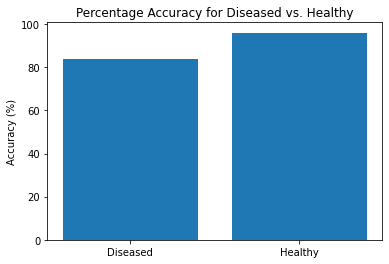

In [71]:
plt.figure()
plt.bar(['Diseased', 'Healthy'], [84,96])
plt.ylabel("Accuracy (%)")
plt.title("Percentage Accuracy for Diseased vs. Healthy")
plt.show()